In [1]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using HNProcess
using DataRefine
using PartitioningData
using Random

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



In [1]:
sim_time = 8
steps = 6000
im_all = orthogonal_image_generator(16)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:3] #random
#sl::Vector{Int64}=[2,5] # set
for t in sl
    push!(selected, im_all[t])
end
g = get_HN_graph(selected,1.0)
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => []#,(1,2,-1),(3,4,1)]
)
println(parameters["delta"])
@show sl

LoadError: UndefVarError: `orthogonal_image_generator` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

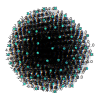

In [554]:
# Graph Checker
graph = get_HN_graph(parameters["images"],1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
 gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [555]:
println(is_connected(graph))
println(maximum(weights(graph)))
println(minimum(weights(graph)))
0 in weights(graph) && println("Graph is not complete")

true
8.0
-12.0
Graph is not complete


In [483]:
# I want to do the following:
# Obtain stimulus by taking random image
# Acquire exactly half of the pixels and set them
# randomly fill the rest

stim_temp = shuffle(parameters["images"])[1]
stim_selects = shuffle(1:length(stim_temp))[1:round(Int,length(stim_temp)/2)]
stimuli = []
for i in stim_selects
   # println(i)
    s = (i%size(stim_temp,1), round(Int,floor(i/size(stim_temp,1))+1), stim_temp[i]) #(row, col, state)
    if s[1] == 0 
       # println(s)
        s = (s[1] + size(stim_temp,1), s[2] - 1, s[3])
       # println(s)
    end
   # println(s)
   # pos = (s[2]-1) * size(parameters["images"][1],1) + s[1]
   # println(pos)
    push!(stimuli, s)
end
@show stimuli
parameters["initial_stimuli"] = stimuli

stimuli = Any[(8, 8, -1), (7, 6, 1), (1, 1, 1), (6, 3, -1), (7, 1, 1), (8, 4, -1), (8, 1, -1), (2, 1, -1), (6, 7, -1), (5, 1, 1), (2, 4, -1), (4, 1, -1), (5, 2, 1), (5, 8, 1), (7, 7, 1), (6, 4, -1), (4, 2, -1), (4, 5, -1), (7, 5, 1), (5, 7, 1), (1, 3, 1), (5, 6, 1), (3, 1, 1), (7, 4, 1), (2, 3, -1), (2, 5, -1), (5, 5, 1), (1, 6, 1), (6, 1, -1), (4, 7, -1), (3, 6, 1), (2, 6, -1)]


32-element Vector{Any}:
 (8, 8, -1)
 (7, 6, 1)
 (1, 1, 1)
 (6, 3, -1)
 (7, 1, 1)
 (8, 4, -1)
 (8, 1, -1)
 (2, 1, -1)
 (6, 7, -1)
 (5, 1, 1)
 (2, 4, -1)
 (4, 1, -1)
 (5, 2, 1)
 ⋮
 (1, 3, 1)
 (5, 6, 1)
 (3, 1, 1)
 (7, 4, 1)
 (2, 3, -1)
 (2, 5, -1)
 (5, 5, 1)
 (1, 6, 1)
 (6, 1, -1)
 (4, 7, -1)
 (3, 6, 1)
 (2, 6, -1)

In [370]:
# I want to do the following:
# Obtain stimulus by taking random image
# Acquire exactly half of the pixels and set them
# randomly fill the rest
function get_random_stimuli(params, r)
    stim_temp = shuffle(params["images"])[1]
    stim_selects = shuffle(1:length(stim_temp))[1:r]
    stimuli = []
    for i in stim_selects
        #println(i)
        s = (i%size(stim_temp,1), round(Int,floor(i/size(stim_temp,1))+1), stim_temp[i]) #(row, col, state)
        if s[1] == 0 
           # println(s)
            s = (s[1] + size(stim_temp,1), s[2] - 1, s[3])
           # println(s)
        end
        #println(s)
        #pos = (s[2]-1) * size(parameters["images"][1],1) + s[1]
        #println(pos)
        push!(stimuli, s)
        #println("\n\n\n\n")
    end
    #@show stimuli
    return stimuli
end

get_random_stimuli (generic function with 1 method)

In [327]:
parameters["initial_stimuli"] = get_random_stimuli(parameters,32)
@show parameters

parameters = Dict{String, Any}("images" => [[1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1; 1 1 -1 -1 -1 -1 1 1], [1 -1 1 -1 -1 1 -1 1; 1 -1 1 -1 -1 1 -1 1; 1 -1 1 -1 -1 1 -1 1; 1 -1 1 -1 -1 1 -1 1; -1 1 -1 1 1 -1 1 -1; -1 1 -1 1 1 -1 1 -1; -1 1 -1 1 1 -1 1 -1; -1 1 -1 1 1 -1 1 -1], [1 1 1 1 1 1 1 1; -1 -1 -1 -1 -1 -1 -1 -1; -1 -1 -1 -1 -1 -1 -1 -1; 1 1 1 1 1 1 1 1; 1 1 1 1 1 1 1 1; -1 -1 -1 -1 -1 -1 -1 -1; -1 -1 -1 -1 -1 -1 -1 -1; 1 1 1 1 1 1 1 1], [1 1 -1 -1 -1 -1 1 1; -1 -1 1 1 1 1 -1 -1; 1 1 -1 -1 -1 -1 1 1; -1 -1 1 1 1 1 -1 -1; -1 -1 1 1 1 1 -1 -1; 1 1 -1 -1 -1 -1 1 1; -1 -1 1 1 1 1 -1 -1; 1 1 -1 -1 -1 -1 1 1], [1 -1 1 -1 1 -1 1 -1; -1 1 -1 1 -1 1 -1 1; -1 1 -1 1 -1 1 -1 1; 1 -1 1 -1 1 -1 1 -1; -1 1 -1 1 -1 1 -1 1; 1 -1 1 -1 1 -1 1 -1; 1 -1 1 -1 1 -1 1 -1; -1 1 -1 1 -1 1 -1 1], [1 1 1 1 1 1 1 1; 1 1 1 1 1 1 1 1; -1 -1 -1 -1 -1 -1 -1 -1; -1 -1 -1 -1 -1 -1 -1 -1; 1 1 1 1 1 1 1 1; 1 1 

Dict{String, Any} with 8 entries:
  "images"          => [[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [1 -1…
  "scaling"         => 1.0
  "iterations"      => 100
  "steps"           => 3000
  "num_agitations"  => 1
  "initial_stimuli" => Any[(8, 2, -1), (6, 5, 1), (4, 8, -1), (1, 4, 1), (7, 4,…
  "sim_time"        => 8
  "delta"           => -0.00266667

In [443]:
pinned::Vector{Tuple{Int64, Int8}} = []
spins = Dice.get_random_configuration(64)
    #println(reshape(state[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
for stim in stimuli
    # Every n entries is a column, thus taking # of columns and subtracting 1 brings you to where the column begins
    # Adding 1 will bring you to the first entry in the column and so on for +k
    pos = (stim[2]-1) * size(parameters["images"][1],1) + stim[1]
    spins[pos] = stim[3]
    push!(pinned, (pos, stim[3]))
end
pretty_table(reshape(spins,8,8))

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │      1 │
│      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│      1 │      1 │      1 │     -1 │      1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │     -1 │      1 │
│      1 │     -1 │     -1 │     -1 │     -1 │     -1 │      1 │     -1 │
│     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │
│     -1 │      1 │     -1 │      1 │     -1 │     -1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘


In [672]:
#Running
parameters["initial_stimuli"] = get_random_stimuli(parameters, 4)
@show parameters["initial_stimuli"]
a = show_available_solutions(parameters,false)
println(length(a))
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len6_t5_no2")
p = size(parameters["images"][1],1)
sol_finder(res[1], parameters)


println("showing min states")
graph = get_HN_graph(parameters["images"],1.0)
r = iterative_rotater_state(res[1], parameters)
s = []
c_now = 999
for i in r
    c_i = cut(graph, i)
    if c_i < c_now
        c_now = c_i
    end
end

for i in r
    c = cut(graph, i)
    if c == c_now
        push!(s,i)
    end
end
for i in s 
    pretty_table(reshape(i[1],8,8))
end

parameters["initial_stimuli"] = Any[(4, 8, 1)]
2
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len6_t5_no2.dat is generated
FOUND
┌────────┬──────

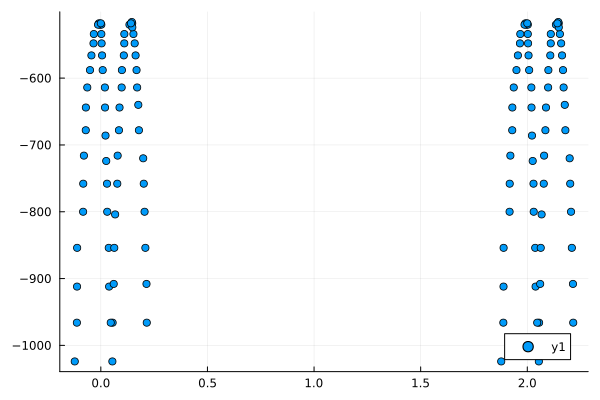

In [671]:
HN_cut_plotter_test(parameters, res[1])
sol_finder_test(

In [673]:
sol_finder_test(res[1], parameters)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

4-element Vector{Any}:
 (Int8[1, -1, -1, 1, -1, 1, 1, -1, -1, 1  …  -1, 1, 1, -1, -1, 1, -1, 1, 1, -1], [-0.8439624374387726, -0.8422405138013502, -0.9209157187107975, -0.9855777445092531, -0.8773949090542954, -0.8496862488954928, -0.9633501405663663, -0.9138187858953046, -0.8823964679990239, -0.8655273446714906  …  -0.5774877179030753, -0.6794888977781719, -0.7407503070086698, -0.6581207229606125, -0.6987383817857089, -0.6660618530654223, -0.6950291542468674, -0.5967948982254696, -0.7102371493888278, -0.6992754026658223])
 (Int8[-1, 1, 1, -1, 1, -1, -1, 1, 1, -1  …  -1, 1, 1, -1, -1, 1, -1, 1, 1, -1], [0.8967878695698972, 0.8985097932073196, 0.8198345882978724, 0.7551725624994168, 0.8633553979543747, 0.8910640581131772, 0.7774001664423036, 0.8269315211133654, 0.8583538390096459, 0.8752229623371797  …  -0.8367374108944052, -0.9387385907695016, -1.0, -0.9173704159519427, -0.9579880747770391, -0.9253115460567525, -0.9542788472381973, -0.8560445912167998, -0.9694868423801579, -0.958525095

In [371]:
# I want to find all images that have that stimuli
# This will show all possible solutions to check that we have everything
# Take stim
# Take image
# Check stim in image, if good, keep, if not remove
function show_available_solutions(params, m = true)
    ims = copy(params["images"])
    #@show parameters["images"]
    for i in params["initial_stimuli"]
        pos = (i[2]-1) * size(params["images"][1],1) + i[1]
        #println(i)
        #println(pos)
        #println(length(ims))
        ims = filter(k -> k[pos] == i[3], ims)
        #println(length(ims))
        length(ims) <= 2 && break
        #println("\n\n")
    end

    if m
        for i in ims
            pretty_table(i)
        end
    end
    return ims
end

show_available_solutions (generic function with 2 methods)

In [633]:
sim_time = 8
steps = 3000
im_all = orthogonal_image_generator(64)
println(length(im_all))
selected::Vector{Matrix{Int64}} = []
sl::Vector{Int64}=shuffle(1:64)[1:6] #random
#sl::Vector{Int64}=[2,5] # set
for t in sl
    push!(selected, im_all[t])
end
g = get_HN_graph(selected,1.0)
parameters = Dict{String, Any}(
    "images" => selected,
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]#,(1,2,-1),(3,4,1)]
)
println(parameters["delta"])
@show sl

64
-0.0026666666666666666
sl = [37, 32, 49, 16, 21, 2]


6-element Vector{Int64}:
 37
 32
 49
 16
 21
  2

In [373]:
graph = get_HN_graph(parameters["images"],1.0)
r = iterative_rotater_state(res[1], parameters)
s = []
c_now = 999
for i in r
    c_i = cut(graph, i)
    if c_i < c_now
        c_now = c_i
    end
    println(c_now)
end

for i in r
    c = cut(graph, i)
    if c == c_now
        push!(s,i)
    end
end

println(s)
for i in s 
    pretty_table(reshape(i[1],4,4))
end




hi
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │     -1 │     -1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col

2-element Vector{Matrix{Int64}}:
 [1 1 … 1 1; -1 -1 … -1 -1; … ; -1 -1 … -1 -1; 1 1 … 1 1]
 [1 -1 … 1 -1; -1 1 … -1 1; … ; -1 1 … -1 1; 1 -1 … 1 -1]

In [634]:
conv = 0
twos = 0 
others = 0
p = size(parameters["images"][1],1)
elp = @elapsed begin
    for i in 1:100
        parameters["initial_stimuli"] = get_random_stimuli(parameters, 1) 
        allowed_sol = show_available_solutions(parameters, false)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],p,p) in allowed_sol ||
                -1 .*reshape(st[1],p,p) in allowed_sol)
                #println("FOUND")
                #pretty_table(reshape(st[1],p,p))
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv += 1
        end
        if sol_count == 2
            twos += 1 
        end
        if sol_count > 2
            others += 1 
        end
    end
end
println("Number of convs: $(conv)")
println("Number of twos: $(twos)")
println("took $elp seconds")

Number of convs: 82
Number of twos: 26
took 9.352246541 seconds


In [423]:
#WARNING will generate a bunch of .dat files
#r = HN_Solver(parameters)

#pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
#allowed_sol = show_available_solutions(parameters)
p = size(parameters["images"][1],1)
conv = 0
elp = @elapsed begin
    for i in 1:10
        parameters["initial_stimuli"] = get_random_stimuli(parameters, 32) 
        allowed_sol = show_available_solutions(parameters,false)
        r = HN_Solver_Traj(parameters)
        rs = iterative_rotater_state(r[1], parameters)
        f = false
        for st in rs
            if (reshape(st[1],p,p) in allowed_sol ||
                -1 .*reshape(st[1],p,p) in allowed_sol)
                conv +=1 
                f = true
                break
            end
        end
        if !f
            println("FAILED AT $i")
            save_trajectories(r[2], "8by8_len_6","iter_$i")
            pretty_table(reshape(r[1][1],p,p))
        end
    end
end
println(conv)
println("took $elp seconds")

FAILED AT 4
File 8by8_len_6_1_iter_4.dat is generated
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │      1 │      1 │     -1 │      1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │     -1 │     -1 │
│     -1 │      1 │     -1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │      1 │      1 │      1 │     -1 │      1 │      1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FAILED AT 10
File 8by8_len_6_1_iter_10.dat is generated
┌─

In [259]:
for o in parameters["images"]
    pretty_table(o)
end

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
│      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ 

In [649]:
function iterative_rotater_state_test(state, params, debug = false)
    rotations = []
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 1+i)
        if debug
            println("rotated by $i")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,i))
    end
    for i in state[2]
        rotated = Dice.realign_hybrid(state, 3+i)
        if debug
            println("rotated by $(2+i)")
            pretty_table(reshape(rotated[1],size(params["images"][1],1),size(params["images"][1],1)))
        end
        push!(rotations, (rotated,2+i))
    end
    return rotations
end

iterative_rotater_state_test (generic function with 2 methods)

In [650]:
function HN_cut_plotter_test(params, state)
    rot = iterative_rotater_state_test(state, params)
    g = get_HN_graph(params["images"],params["scaling"])
    st = [i[1] for i in rot]
    binary = [k[1] for k in st]
    x = [i[2] for i in rot]
    y = [Dice.cut(g,s) for s in (rot[k][1] for k in 1:length(rot))]
    p = scatter(x,y)
    return p
end

HN_cut_plotter_test (generic function with 1 method)

In [660]:
function sol_finder_test(state, params)
    rots = iterative_rotater_state_test(state, params)
    k = [i[1] for i in rots]
    sol = []
    for st in k
        if (reshape(st[1],size(params["images"][1],1),size(params["images"][1],2)) in params["images"] ||
            -1 .*reshape(st[1],size(params["images"][1],1),size(params["images"][1],2)) in params["images"])
            println("FOUND")
            pretty_table(reshape(st[1],size(params["images"][1],1),size(params["images"][1],2)))
            push!(sol, st)
        end
    end
    return sol
end

sol_finder_test (generic function with 1 method)

In [661]:
sol_finder_test(res[1], parameters)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

4-element Vector{Any}:
 (Int8[1, 1, 1, 1, -1, -1, -1, -1, 1, 1  …  1, 1, -1, -1, -1, -1, 1, 1, 1, 1], [-0.43069743826955387, -0.9980069077206295, -0.4767822115816549, -0.8563207278315907, -0.8627769860529304, -0.4812518659499594, -0.901035378031342, -0.4062195219948408, -0.39512431971559536, -0.9589846683615013  …  -0.5101652883294951, -0.9532981170964194, -0.9788626871227357, -0.4119131382452985, -0.991690039902037, -0.36565447157304165, -0.4847744093369175, -0.9760297551101917, -0.36536045171680387, -0.9313729535080304])
 (Int8[1, -1, 1, -1, 1, -1, 1, -1, 1, -1  …  1, -1, 1, -1, 1, -1, 1, -1, 1, -1], [-0.9205321499400583, 0.5121583806088661, -0.9666169232521593, 0.6538445604979046, 0.647388302276565, -0.971086577620464, 0.6091299102981536, -0.8960542336653454, -0.8849590313860998, 0.5511806199679941  …  -1.0, 0.5568671712330759, 0.5313026012067597, -0.9017478499158034, 0.5184752484274586, -0.8554891832435463, -0.9746091210074219, 0.5341355332193038, -0.8551951633873083, 0.57879233482